In [1]:
########################
# Logistic Regression ##
########################
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm

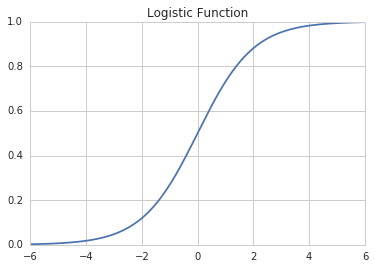

In [2]:
##############################
## plot logistic regression ##

def logistic(t):
    return 1.0/(1+math.exp((-1.0)*t))
t = np.linspace(-6,6,500)                 #generate an array of -6 to 6
y=np.array([logistic(ele) for ele in t])  #apply logistic function to each element
plt.plot(t,y)                             #plot other function 
plt.title('Logistic Function')

In [3]:
######### import sample data set
df=sm.datasets.fair.load_pandas().data  #Affairs dataset
df.head()
#     rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
#                     4 = good, 5 = very good
#     age             : Age
#     yrs_married     : No. years married. Interval approximations. See
#                     original paper for detailed explanation.
#     children        : No. children
#     religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
#                     4 = strongly
#     educ            : Level of education, 9 = grade school, 12 = high
#                     school, 14 = some college, 16 = college graduate,
#                     17 = some graduate school, 20 = advanced degree
#     occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
#                     or unskilled worker; 3 = white-colloar; 4 = teacher
#                     counselor social worker, nurse; artist, writers;
#                     technician, skilled worker, 5 = managerial,
#                     administrative, business, 6 = professional with
#                     advanced degree
#     occupation_husb : Husband's occupation. Same as occupation.
#     affairs         : measure of time spent in extramarital affairs

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


            rate_marriage        age  yrs_married  children  religious  \
Had_Affair                                                               
0                4.329701  28.390679     7.989335  1.238813   2.504521   
1                3.647345  30.537019    11.152460  1.728933   2.261568   

                 educ  occupation  occupation_husb   affairs  
Had_Affair                                                    
0           14.322977    3.405286         3.833758  0.000000  
1           13.972236    3.463712         3.884559  2.187243  


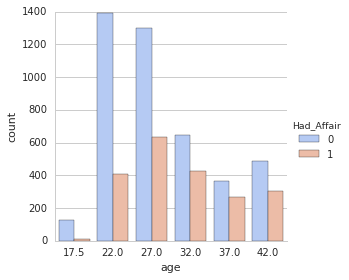

In [4]:
## recode affairs to be 0 or 1
def affair_check(x):
    if x != 0:
        return 1 
    else:
        return 0 
df['Had_Affair'] = df['affairs'].apply(affair_check)     # recode had affair to be 0 or 1 
print df.groupby('Had_Affair').mean()                    # show mean of all variables group by had_affair
sns.factorplot('age',kind='count',data=df,hue='Had_Affair',palette='coolwarm')  #plot the distribution

In [5]:
### prepare data, create dummies for categorical data ####
df_reg = df                                              # create a copy of the dataframe
occ_dummies = pd.get_dummies(df['occupation'])           # create dummies based on occupation categories
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])  # create dummies based on occupation_husb
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis = 1)             # concatnate two dummies dataframe
X = df_reg.drop(['occupation','occupation_husb','Had_Affair'],axis=1)   # drop out categorical variables
X = pd.concat([X,dummies],axis=1)
####because of multicollinearity, we need to drop 1 variable for each dummy groups
X= X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)
## drop affair column, as we are treating had affair as y 
X = X.drop('affairs',axis=1)
#make Had_Affair as Y variable
Y = df.Had_Affair
Y = np.ravel(Y)                            # make Y as (1,n) array 
Y

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
#########################################
####### run logistic regression #########
#########################################

log_model = LogisticRegression()
log_model.fit(X,Y)
#the score is the accuracy rating
print log_model.score(X,Y)                     
print Y.mean()
##look at the coefficients
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
print coeff_df

0.726044612001
0.322494502042
                0                   1
0   rate_marriage    [-0.69773901275]
1             age  [-0.0563288132225]
2     yrs_married    [0.103853116954]
3        children   [0.0181065998304]
4       religious   [-0.367989763576]
5            educ  [0.00903270157738]
6            occ2    [0.293793852647]
7            occ3    [0.604549716995]
8            occ4     [0.34183781875]
9            occ5    [0.938970273528]
10           occ6    [0.895723883821]
11          hocc2    [0.233360797075]
12          hocc3    [0.337371379495]
13          hocc4    [0.202618150199]
14          hocc5    [0.225526102484]
15          hocc6    [0.228427968956]


In [7]:
######################################
## Use Testing and Training Data sets#

X_train,X_test, Y_train, Y_test = train_test_split(X,Y)
log_model2=LogisticRegression()
log_model2.fit(X_train,Y_train)
## use predict to evaluate model 
class_predict = log_model2.predict(X_test)
print metrics.accuracy_score(Y_test,class_predict)  #the accuracy of our prediction



0.729271356784
